<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data: Wholesale customers data

# Load the dataset into a pandas DataFrame
file_path = '../data/Wholesale customers data.csv'
wholesale_data = pd.read_csv(file_path) #pd. is pandas module and need to be imported to run

# Display basic statistical summary
print(wholesale_data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 colum

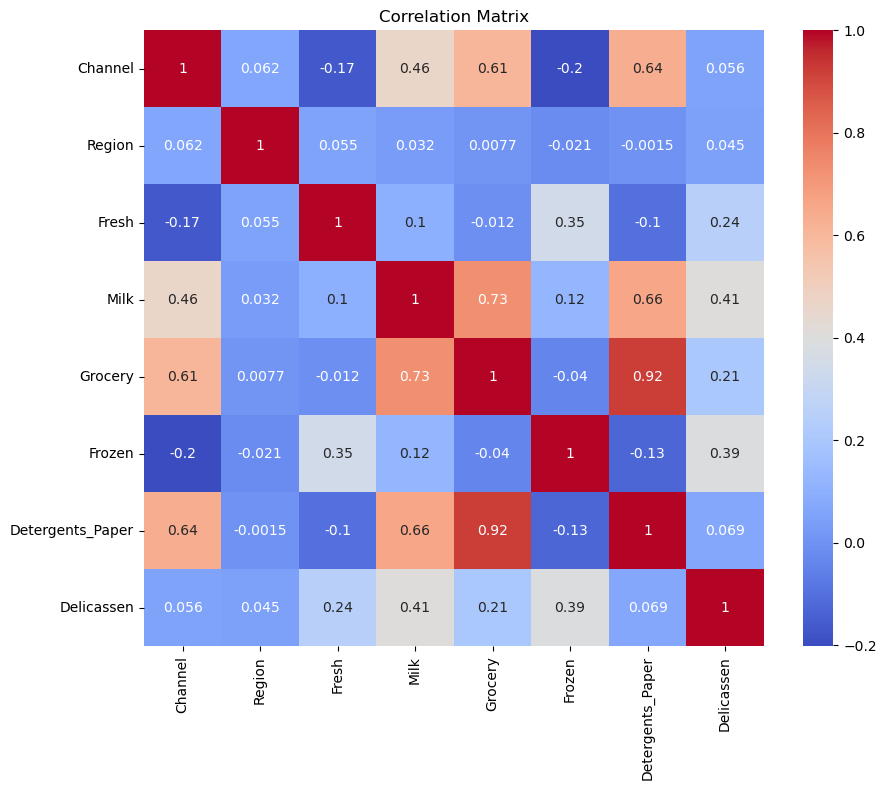

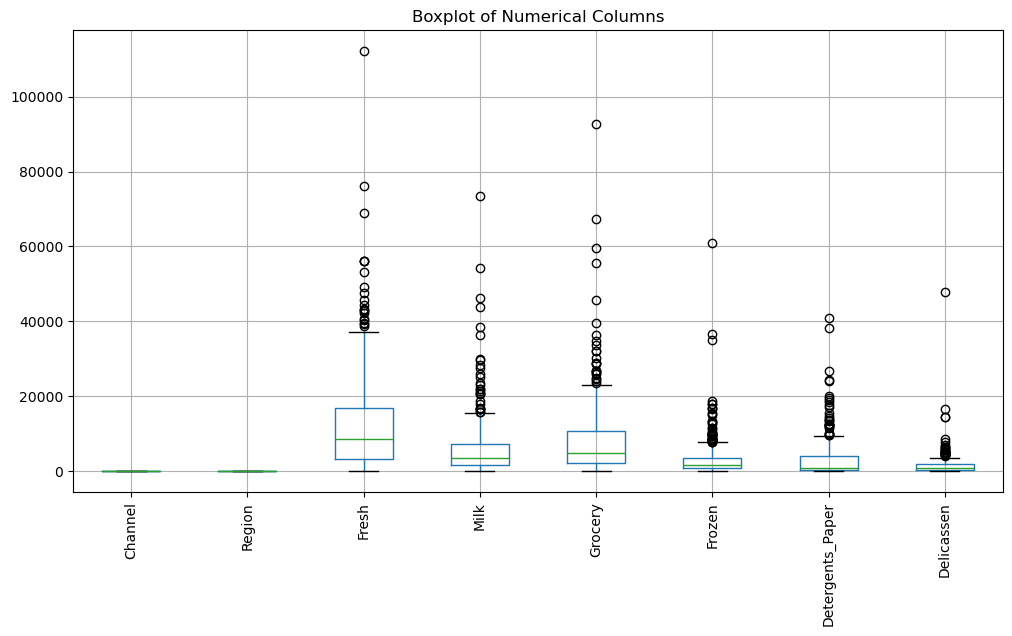

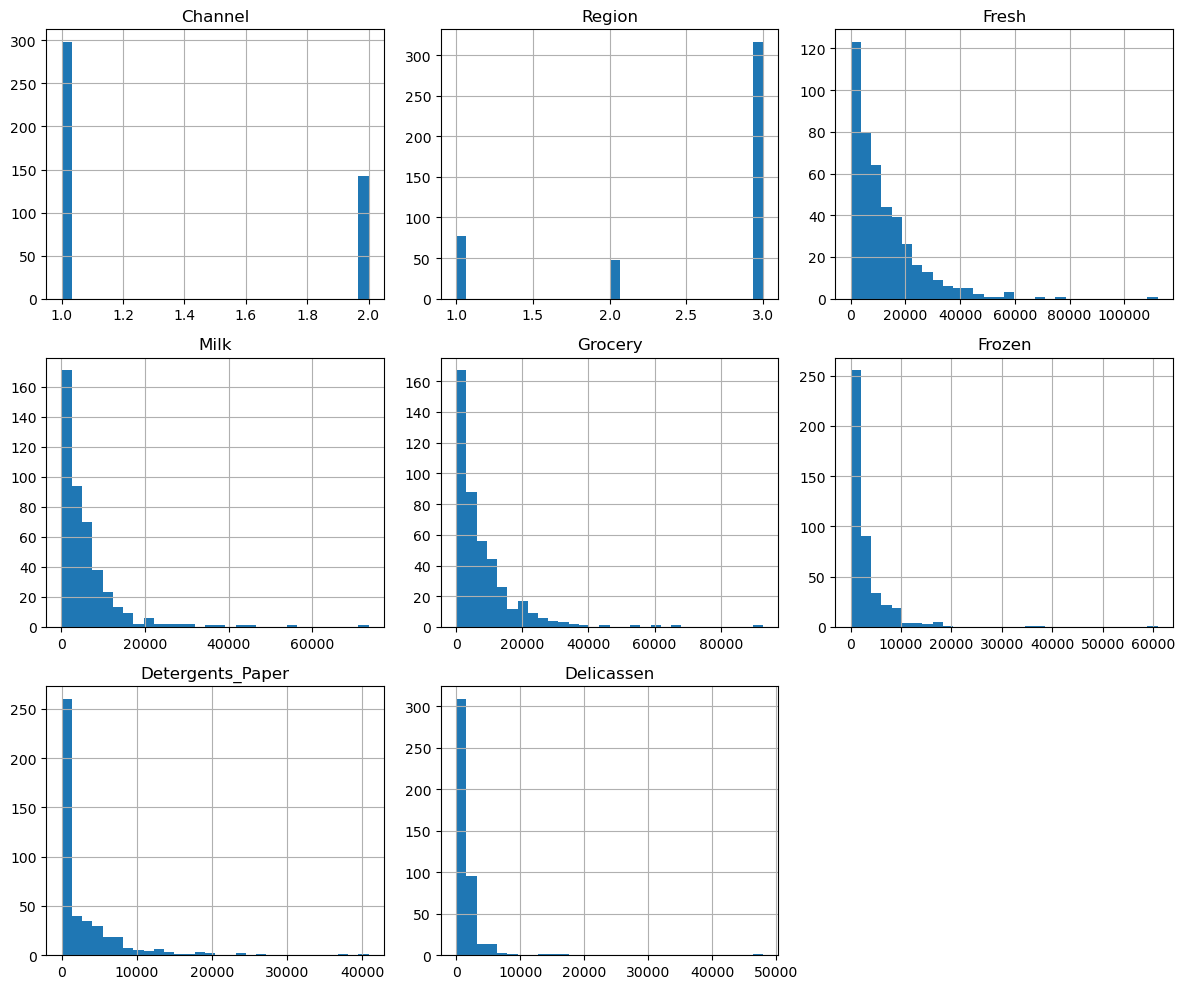

Maximum cumulative percentage for top 20% customers: 42.90483942679298


In [5]:

print(wholesale_data.dtypes)
print(wholesale_data.nunique())
print(wholesale_data.head())

print(wholesale_data.info())

# Step 2
print(wholesale_data['Channel'].value_counts())

print(wholesale_data['Region'].value_counts())
# Step 3
print(wholesale_data.isnull().sum())
# Step 4
import seaborn as sns
import matplotlib.pyplot as plt

correlation = wholesale_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# Step 5
wholesale_data.boxplot(figsize=(12, 6), rot=90)
plt.title("Boxplot of Numerical Columns")
plt.show()
# Step 6
wholesale_data.hist(bins=30, figsize=(12, 10), layout=(3, 3))
plt.tight_layout()
plt.show()
# Step 7:
wholesale_data['Total_Sales'] = wholesale_data.iloc[:, 2:].sum(axis=1)

# Sort the dataset by total sales in descending order
pareto_data = wholesale_data.sort_values(by='Total_Sales', ascending=False)

# Calculate cumulative percentage of total sales
pareto_data['Cumulative_Percentage'] = pareto_data['Total_Sales'].cumsum() / pareto_data['Total_Sales'].sum() * 100

# Check if 20% of customers generate 80% of the total sales
top_20_percent = pareto_data.head(int(len(pareto_data) * 0.2))
print("Maximum cumulative percentage for top 20% customers:", top_20_percent['Cumulative_Percentage'].max())

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

Original dataset size: 440
Cleaned dataset size: 332
Categorical columns have been encoded:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Total_Sales  \
0  12669  9656     7561     214              2674        1338        34112   
1   7057  9810     9568    1762              3293        1776        33266   
3  13265  1196     4221    6404               507        1788        27381   
5   9413  8259     5126     666              1795        1451        26710   
6  12126  3199     6975     480              3140         545        26465   

   Channel_2  Region_2  Region_3  
0       True     False      True  
1       True     False      True  
3      False     False      True  
5       True     False      True  
6       True     False      True  


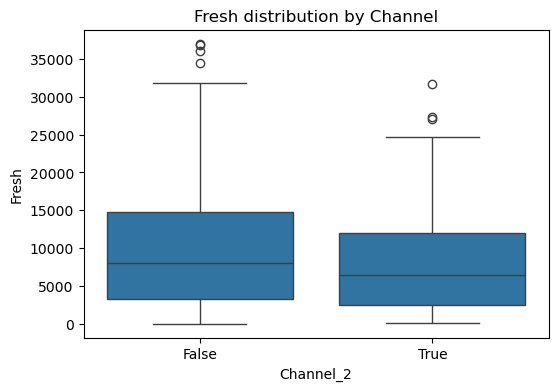

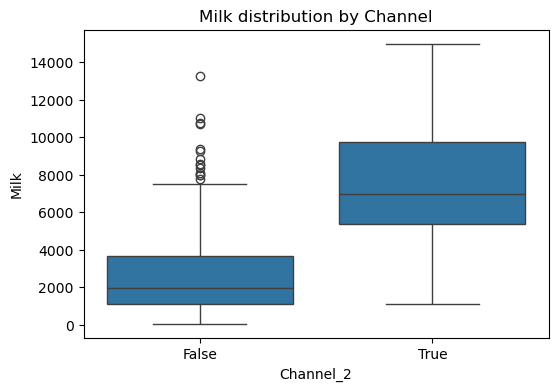

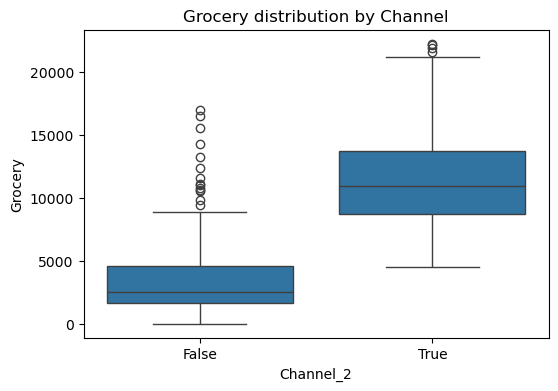

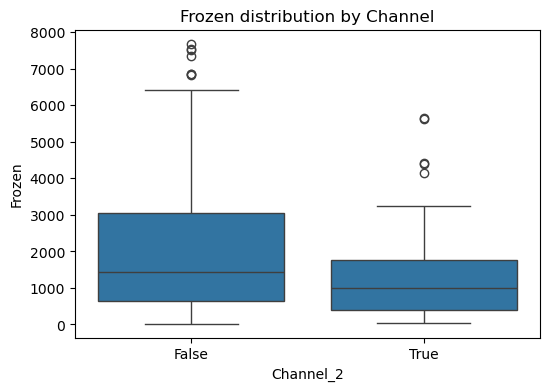

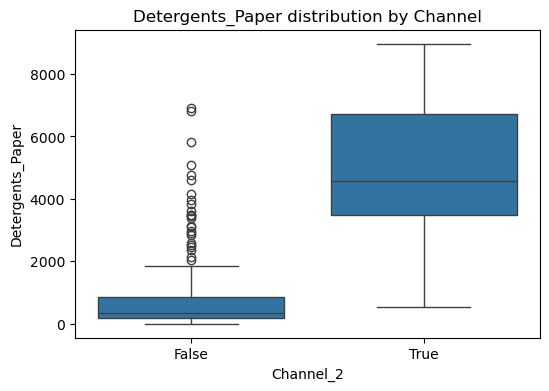

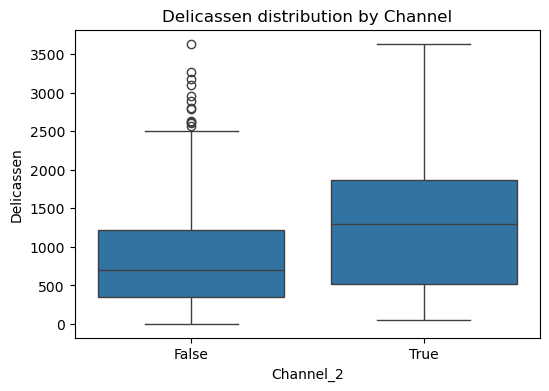

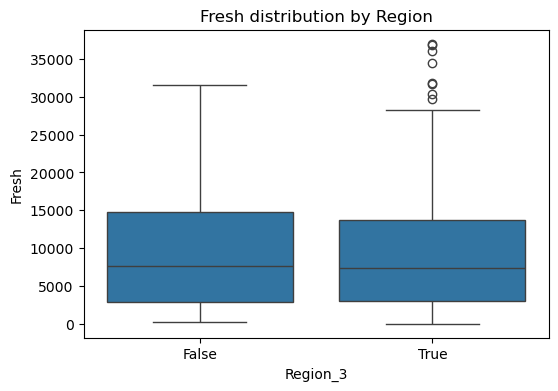

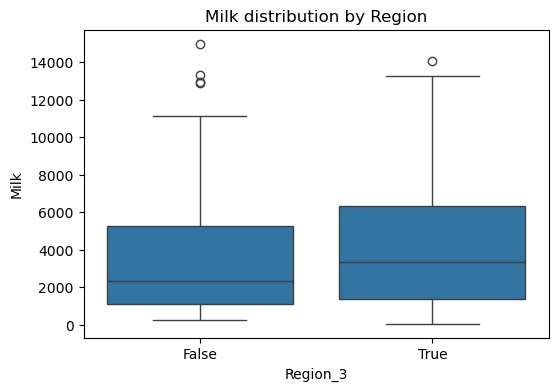

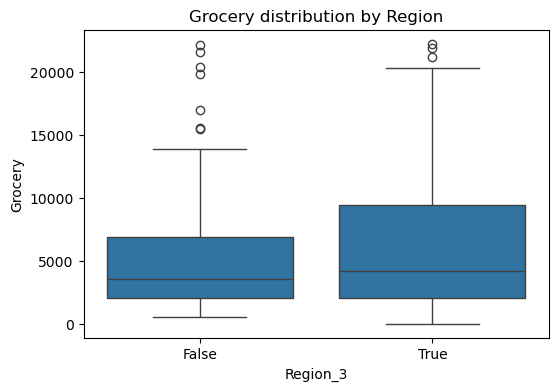

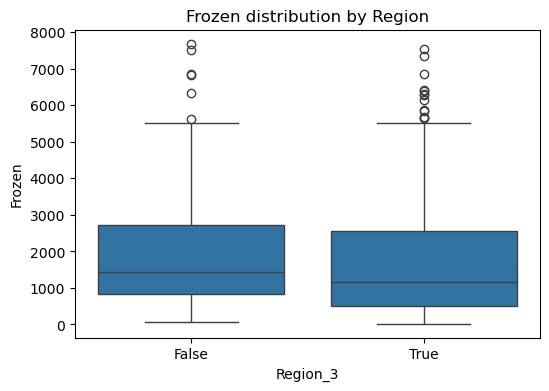

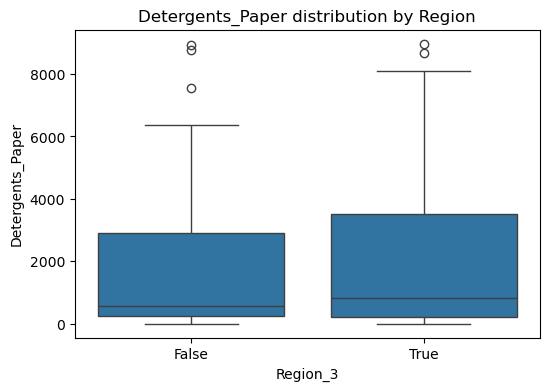

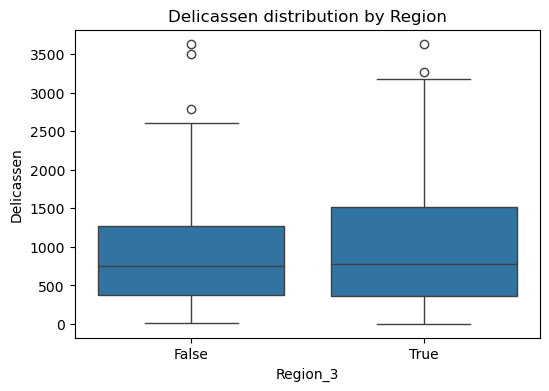

In [6]:

#Step 1

Q1 = wholesale_data.quantile(0.25)
Q3 = wholesale_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
cleaned_data = wholesale_data[~((wholesale_data < lower_bound) | (wholesale_data > upper_bound)).any(axis=1)]

print(f"Original dataset size: {wholesale_data.shape[0]}")
print(f"Cleaned dataset size: {cleaned_data.shape[0]}")
# Step 2

encoded_data = pd.get_dummies(cleaned_data, columns=['Channel', 'Region'], drop_first=True)

print("Categorical columns have been encoded:")
print(encoded_data.head())


import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Channel vs numerical columns
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=encoded_data['Channel_2'], y=encoded_data[col])
    plt.title(f'{col} distribution by Channel')
    plt.show()

# Boxplot for Region vs numerical columns
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=encoded_data['Region_3'], y=encoded_data[col])
    plt.title(f'{col} distribution by Region')
    plt.show()

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [7]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Step 1
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(encoded_data[numerical_columns])

# Convert scaled numerical data back to a DataFrame
customers_scale = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

# Step 2
# Add 'Channel_2' to the dataset
#customers_scale = pd.concat([scaled_numerical_df, encoded_data[['Channel_2']]], axis=1)

print("Final dataset prepared for clustering:")
print(customers_scale.head())

Final dataset prepared for clustering:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.383041  1.652898  0.334978 -0.967004          0.305053    0.390465
1 -0.305588  1.698756  0.733878 -0.059255          0.569139    0.922591
2  0.456174 -0.866283 -0.328862  2.662821         -0.619462    0.937169
3 -0.016491  1.236906 -0.148989 -0.701951         -0.069958    0.527749
4  0.316411 -0.269838  0.218508 -0.811022          0.503864   -0.572949


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

Cluster labels assigned to each record:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.383041  1.652898  0.334978 -0.967004          0.305053    0.390465   
1 -0.305588  1.698756  0.733878 -0.059255          0.569139    0.922591   
2  0.456174 -0.866283 -0.328862  2.662821         -0.619462    0.937169   
3 -0.016491  1.236906 -0.148989 -0.701951         -0.069958    0.527749   
4  0.316411 -0.269838  0.218508 -0.811022          0.503864   -0.572949   

   Cluster  
0        0  
1        0  
2        2  
3        0  
4        1  


c:\Users\matel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


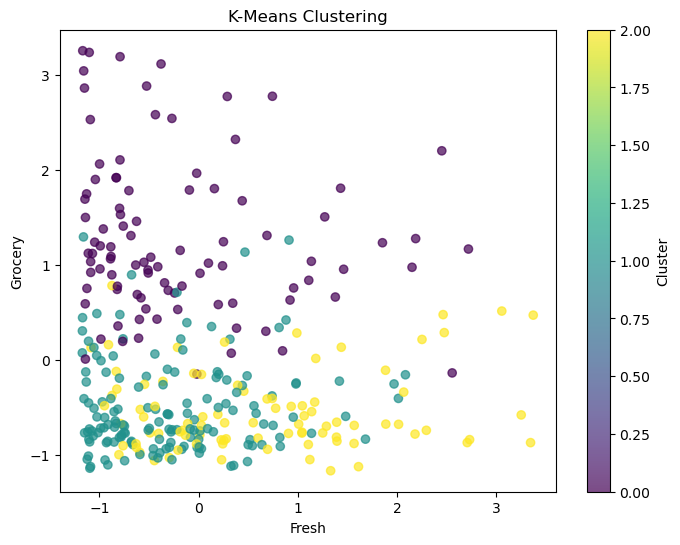

In [8]:
from sklearn.cluster import KMeans

# Your code here:

# Step 1
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters if necessary

# Step 2
kmeans.fit(customers_scale)

# Step 3
customers_scale['Cluster'] = kmeans.labels_

print("Cluster labels assigned to each record:")
print(customers_scale.head())
import matplotlib.pyplot as plt

# Example scatter plot of two features with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(customers_scale['Fresh'], customers_scale['Grocery'], c=customers_scale['Cluster'], cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.colorbar(label="Cluster")
plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [12]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Users\matel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
cleaned_data['Label'] = clusters

C:\Users\matel\AppData\Local\Temp\ipykernel_16748\2489950765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Label'] = clusters


Count the values in `labels`.

Number of records in each cluster:
Cluster
1    149
0     95
2     88
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

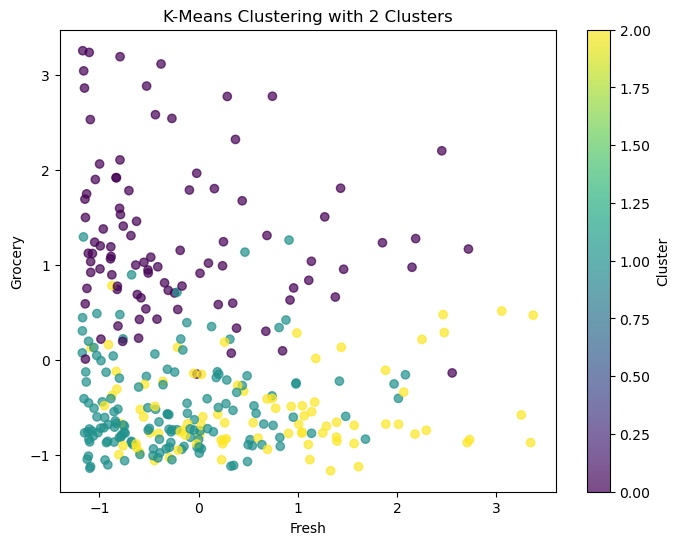

Cluster statistics:
            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Cluster                                                                      
0       -0.190695  1.180435  1.275253 -0.358443          1.271068    0.580885
1       -0.262702 -0.444033 -0.495102 -0.502980         -0.466586   -0.433170
2        0.650666 -0.522504 -0.538396  1.238592         -0.582160    0.106345


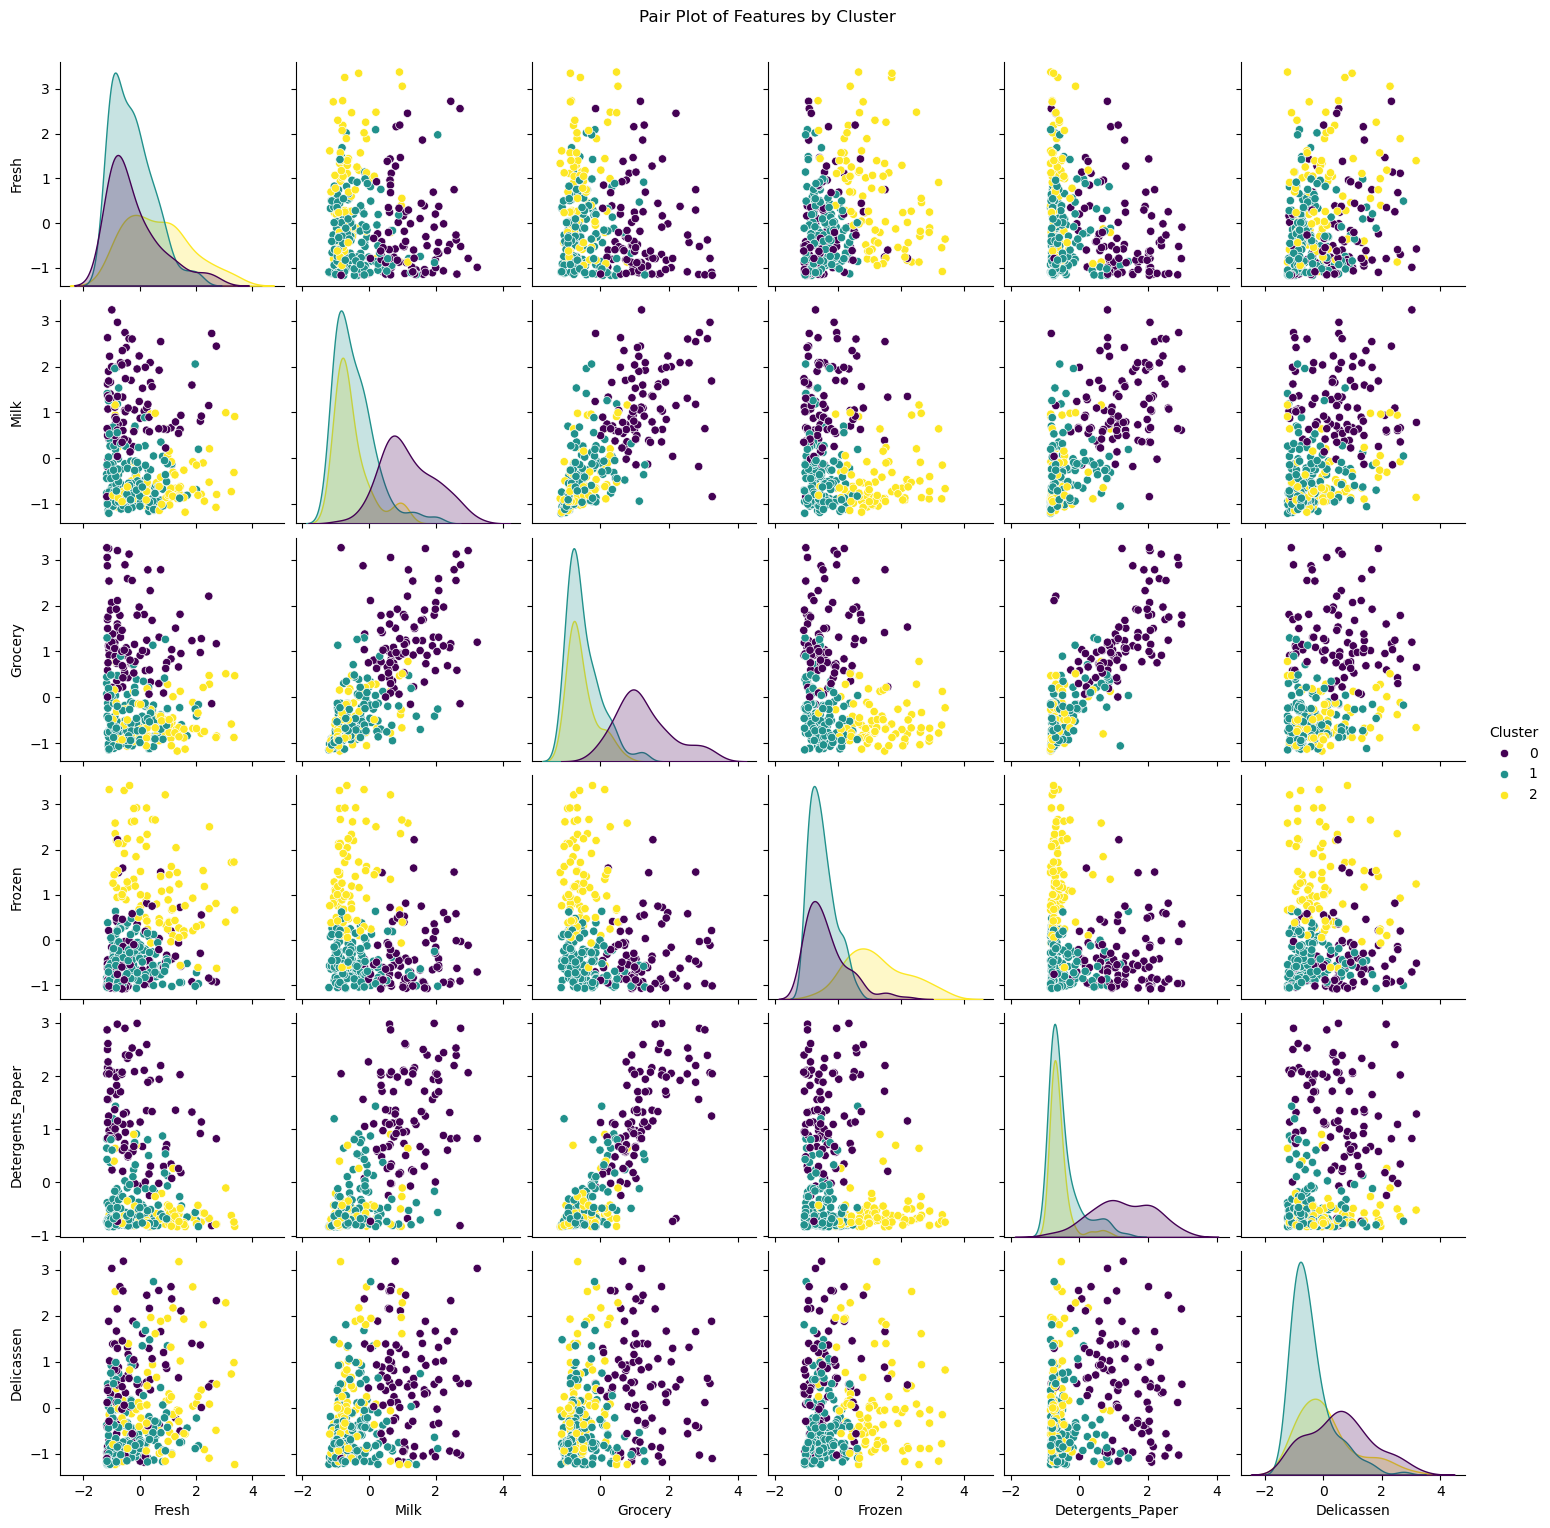

C:\Users\matel\AppData\Local\Temp\ipykernel_16748\1509850151.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=customers_scale, palette='viridis')


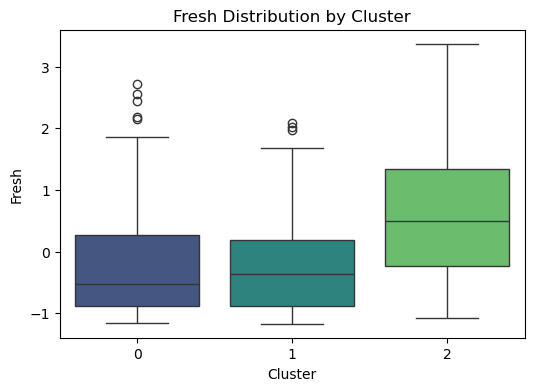

C:\Users\matel\AppData\Local\Temp\ipykernel_16748\1509850151.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=customers_scale, palette='viridis')


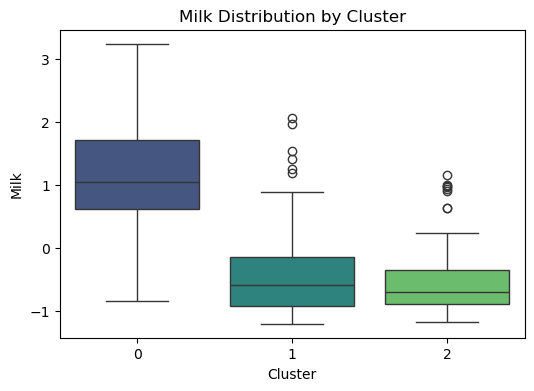

C:\Users\matel\AppData\Local\Temp\ipykernel_16748\1509850151.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=customers_scale, palette='viridis')


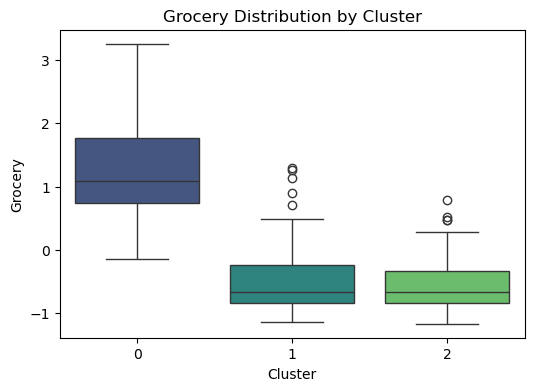

C:\Users\matel\AppData\Local\Temp\ipykernel_16748\1509850151.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=customers_scale, palette='viridis')


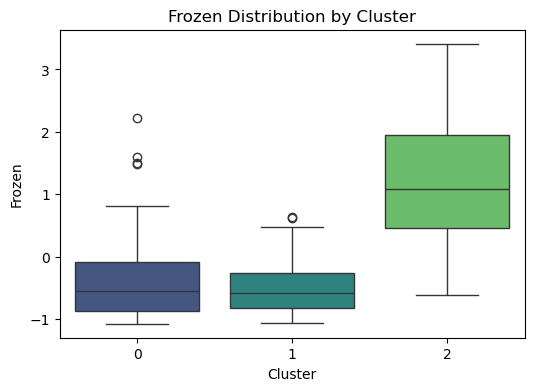

C:\Users\matel\AppData\Local\Temp\ipykernel_16748\1509850151.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=customers_scale, palette='viridis')


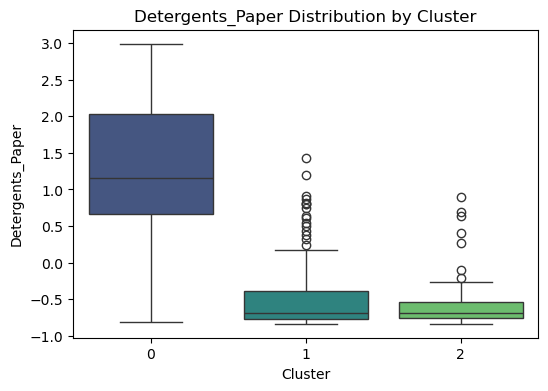

C:\Users\matel\AppData\Local\Temp\ipykernel_16748\1509850151.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=customers_scale, palette='viridis')


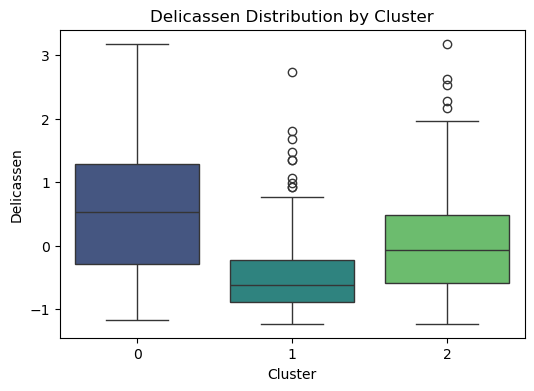

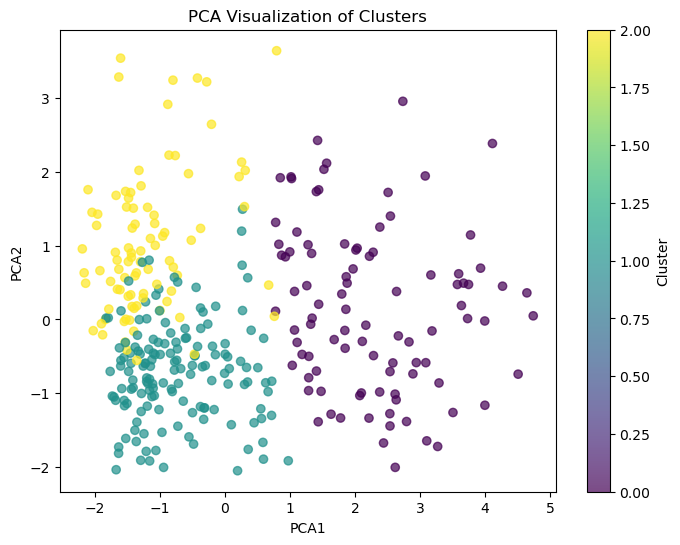

In [18]:
# Your code here:

# Count the number of records in each cluster
label_counts = customers_scale['Cluster'].value_counts()
print("Number of records in each cluster:")
print(label_counts)
import matplotlib.pyplot as plt

# Scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(customers_scale['Fresh'], customers_scale['Grocery'], c=customers_scale['Cluster'], cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering with 2 Clusters")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.colorbar(label="Cluster")
plt.show()
#Clusters Stats details

cluster_stats = customers_scale.groupby('Cluster').mean()
print("Cluster statistics:")
print(cluster_stats)
#Displaying all columns with pairs of scatter plots

import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of all numerical columns with cluster labels
sns.pairplot(customers_scale, vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], 
             hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()
#Boxplots for each column grouped by cluster

# Boxplots for each numerical column grouped by clusters
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=customers_scale, palette='viridis')
    plt.title(f'{col} Distribution by Cluster')
    plt.show()
#Dimensionality reduction (optional)
# If you want a global visualization of the data in multiple dimensions, you can apply techniques such as 
# PCA (Principal Component Analysis) or t-SNE to reduce the dimensions to 2D or 3D and then visualize the clusters.

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customers_scale.drop(columns=['Cluster']))
customers_scale['PCA1'] = pca_result[:, 0]
customers_scale['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(customers_scale['PCA1'], customers_scale['PCA2'], c=customers_scale['Cluster'], cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [19]:
from sklearn.cluster import DBSCAN 

# Your code here

# Step 1: Initialize the DBSCAN model with eps=0.5
dbscan = DBSCAN(eps=0.5)  # Adjust min_samples if needed

# Step 2: Fit the model to the scaled dataset
dbscan_labels = dbscan.fit_predict(customers_scale)

# Step 3: Assign DBSCAN labels to the dataset
customers_scale['labels_DBSCAN'] = dbscan_labels


Count the values in `labels_DBSCAN`.

In [20]:
# Your code here

#Count the number of points in each cluster
dbscan_counts = customers_scale['labels_DBSCAN'].value_counts()
print("DBSCAN Cluster Counts:")
print(dbscan_counts)


DBSCAN Cluster Counts:
labels_DBSCAN
-1    305
 0     18
 1      9
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [30]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

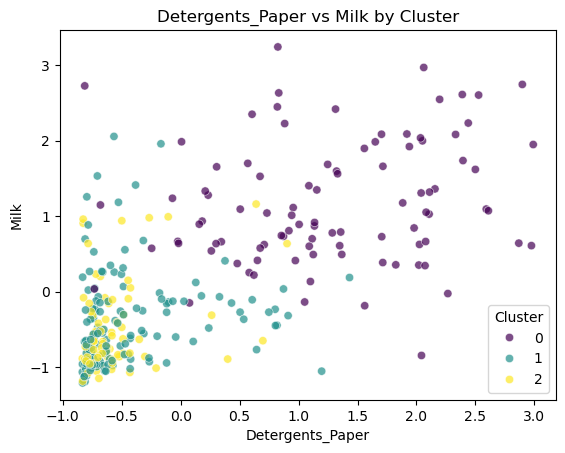

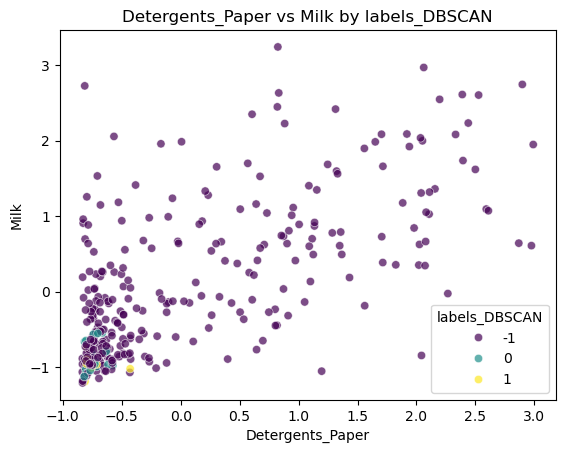

In [22]:
# Your code here:
# corrected function
def plot(x, y, hue, data):
    sns.scatterplot(x=x, y=y, hue=hue, data=data, palette="viridis", alpha=0.7)
    plt.title(f'{x} vs {y} by {hue}')
    plt.show()

# Visualization
plot('Detergents_Paper', 'Milk', 'Cluster', customers_scale)  # For K-Means
plot('Detergents_Paper', 'Milk', 'labels_DBSCAN', customers_scale)  # For DBSCAN

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

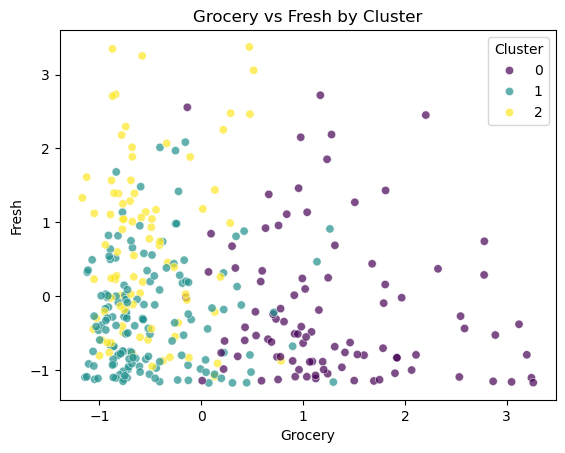

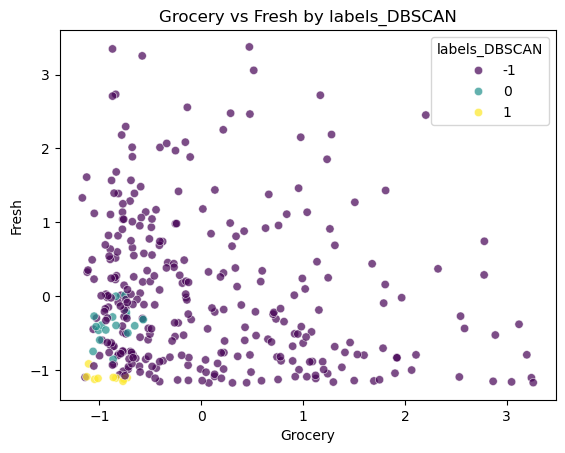

In [24]:
# Your code here:

plot('Grocery', 'Fresh', 'Cluster', customers_scale)  # For K-Means
plot('Grocery', 'Fresh', 'labels_DBSCAN', customers_scale)  # For DBSCAN

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

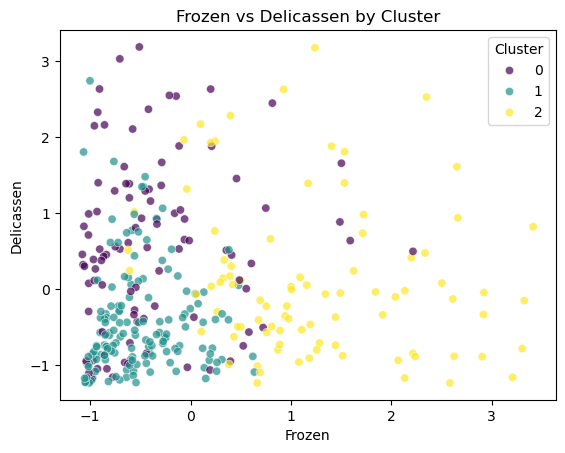

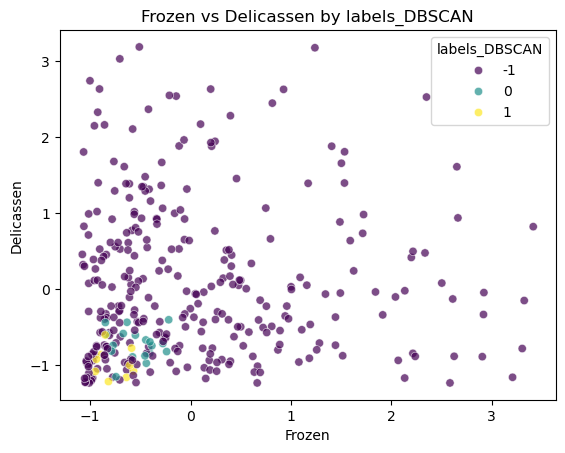

In [25]:

# Your code here:

plot('Frozen', 'Delicassen', 'Cluster', customers_scale)  # For K-Means
plot('Frozen', 'Delicassen', 'labels_DBSCAN', customers_scale)  # For DBSCAN

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [27]:
# Your code here:
# Group by K-Means labels and calculate the mean
kmeans_means = customers_scale.groupby('Cluster').mean()
print("Means by K-Means clusters:")
print(kmeans_means)

# Group by DBSCAN labels and calculate the mean
dbscan_means = customers_scale.groupby('labels_DBSCAN').mean()
print("\nMeans by DBSCAN clusters:")
print(dbscan_means)

Means by K-Means clusters:
            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Cluster                                                                         
0       -0.190695  1.180435  1.275253 -0.358443          1.271068    0.580885   
1       -0.262702 -0.444033 -0.495102 -0.502980         -0.466586   -0.433170   
2        0.650666 -0.522504 -0.538396  1.238592         -0.582160    0.106345   

             PCA1      PCA2  labels_DBSCAN  
Cluster                                     
0        2.262197  0.135398      -1.000000  
1       -0.739656 -0.693051      -0.758389  
2       -1.189772  1.027292      -1.000000  

Means by DBSCAN clusters:
                  Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
labels_DBSCAN                                                             
-1             0.054515  0.080057  0.076879  0.054199          0.065396   
 0            -0.379225 -0.858805 -0.844751 -0.538247         -0.734818   
 1            -

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 